In [2]:
import h5py
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import vitamin
from vitamin import vitamin_parser
from vitamin import gw

module 'basemap' is not installed
Skyplotting functionality is automatically disabled.


In [3]:
%matplotlib inline

In [1]:
config = "/home/joseph.bayley/public_html/CBC/vitamin_refactor_O4/chirp4s/run9/config.ini"

In [4]:
dir(vitamin)

['CVAE',
 '__author__',
 '__builtins__',
 '__cached__',
 '__credits__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'callbacks',
 'group_inference_parameters',
 'initialise_directory',
 'out_dist',
 'plotting',
 'sys',
 'train_plots',
 'vitamin_model']

In [4]:
cfg = gw.gw_parser.GWInputParser(config)

2022-08-24 04:00:01.989618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-24 04:00:02.133275: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-24 04:00:02.249212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2022-08-24 04:00:04.958023: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
cfg.config["training"]["chunk_batch"] = 2

In [6]:
cfg["training"]["chunk_batch"]

2

In [7]:
dt = gw.load_data.DataLoader(os.path.join(cfg["data"]["data_directory"], "training"),cfg)

In [8]:
dt.load_next_chunk()

/home/joseph.bayley/projects/Vitamin/vitamin_refactor/vitamin/gw/load_data.py:411: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data['x_data'] = np.concatenate(np.array(data['x_data']), axis=0).squeeze()
/home/joseph.bayley/projects/Vitamin/vitamin_refactor/vitamin/gw/load_data.py:417: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data['y_hplus_hcross'] = np.transpose(np.concatenate(np.array(data['y_hplus_hcross']), axis=0),[0,2,1])
2022-08-24 04:02:01.869297: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% o

load_time chunk 0: 21.768380165100098


In [12]:
tdt = gw.load_data.DataLoader(os.path.join(cfg["data"]["data_directory"], "test", "waveforms"),cfg, test_set=True)

In [13]:
tdt.load_next_chunk()

In [30]:
np.shape(tdt.Y_noisy[0])

TensorShape([4096, 2])

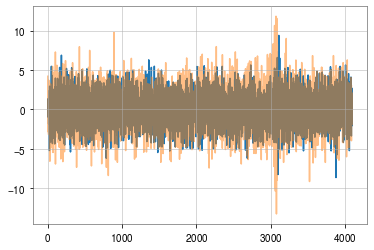

In [34]:
fig, ax = plt.subplots()
ax.plot(dt[0][0][0][:,0]*2)
ax.plot(np.array(tdt.Y_noisy[0])[:,0], alpha = 0.5)

In [15]:
np.shape(dt.X)

TensorShape([1024, 15])

In [16]:
dt.X

<tf.Tensor: shape=(1024, 15), dtype=float32, numpy=
array([[0.62100077, 0.25779688, 0.43236917, ..., 0.44833183,
        0.01555976, 0.8633359 ],
       [0.69418097, 0.5943164 , 0.30299145, ..., 0.29743302,
        0.6822193 , 0.4091856 ],
       [0.8084933 , 0.4593553 , 0.502796  , ..., 0.85190415,
        0.4349214 , 0.6411384 ],
       ...,
       [0.53331447, 0.14704657, 0.70785946, ..., 0.62071526,
        0.83559424, 0.07839061],
       [0.96403164, 0.60300845, 0.39125368, ..., 0.5982622 ,
        0.01212283, 0.47791728],
       [0.90637696, 0.39111134, 0.994157  , ..., 0.6672172 ,
        0.7729316 , 0.46153745]], dtype=float32)>

In [35]:
print(np.min(dv.X))

0.00017046944


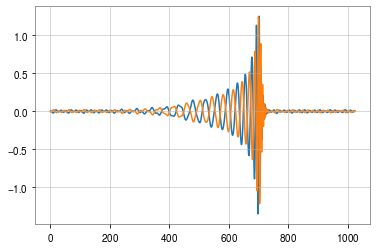

In [19]:
fig, ax = plt.subplots()
ax.plot(dt.Y_noisefree[0,:])

In [20]:
dat = dt[0]

In [23]:
np.shape(dat[0])

(512, 1024, 2)

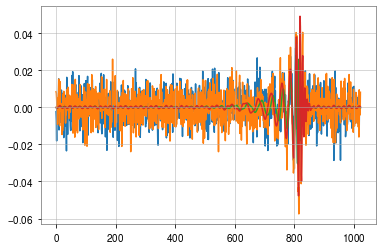

In [27]:
fig, ax = plt.subplots()
ax.plot(dat[0][1,:])
ax.plot(dt.Y_noisefree[1,:]/128)

In [36]:
dv = vitamin.load_data.DataLoader(os.path.join(cfg["data"]["data_directory"], "validation"),cfg)

In [37]:
dv.load_next_chunk()

Reached maximum number of chunks, restarting index and shuffling files


/home/joseph.bayley/.local/lib/python3.7/site-packages/bilby/gw/detector/psd.py:362: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise


load_time chunk 0: 1.277165412902832


In [42]:
len(dv)

2

In [41]:
dv[2]

(array([], shape=(0, 1024, 2), dtype=float32),
 array([], shape=(0, 15), dtype=float32))

In [18]:
dtest = vitamin.load_data.DataLoader(os.path.join(cfg["data"]["data_directory"], "test", "waveforms"),cfg, test_set=True)

In [19]:
dtest.load_next_chunk()

In [9]:
input_dir = "/home/joseph.bayley/data/CBC/O4MDC/validation_sets_realnoise_2det_15par_4096Hz_2s_widespin/tset_tot-1000_split-1000/"

In [3]:
filename = "data_61000-10000000.h5py"

In [12]:
with open(os.path.join(input_dir,filename),"r") as f:
    print(f)

<_io.TextIOWrapper name='/home/joseph.bayley/data/CBC/O4MDC/training_sets_realnoise_2det_15par_4096Hz_2s_widespin/tset_tot-10000000_split-1000/data_61000-10000000.h5py' mode='r' encoding='UTF-8'>


In [ ]:
data_453000-10000000.h5py

In [5]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [ ]:
for fname in os.listdir(input_dir):

    with h5py.File(os.path.join(input_dir,fname), 'r') as f:
        pass

In [13]:
os.listdir(input_dir)

[]

In [45]:
xdat = np.linspace(0,1,100)

In [98]:
s_arr = tf.transpose(tf.split(tf.transpose(tf.repeat(tf.sin(10*xdat[:,np.newaxis]), 6, axis = 1)), 2,axis = 0), (1,2,0))

In [99]:
s_arr.shape

TensorShape([3, 100, 2])

In [102]:
spl = tf.split(s_arr, 5, axis=1)
#spl_arr = tf.reshape(spl, (-1, 5, 20))
con_arr = tf.transpose(tf.squeeze(tf.concat(tf.expand_dims(spl, -1), axis = 2)), perm = (1,0,2, 3))
c_arr = tf.transpose(spl, (1,0,2, 3))

In [103]:
c_arr

<tf.Tensor: shape=(3, 5, 20, 2), dtype=float64, numpy=
array([[[[ 0.        ,  0.        ],
         [ 0.10083842,  0.10083842],
         [ 0.20064886,  0.20064886],
         [ 0.2984138 ,  0.2984138 ],
         [ 0.39313661,  0.39313661],
         [ 0.48385164,  0.48385164],
         [ 0.56963411,  0.56963411],
         [ 0.64960951,  0.64960951],
         [ 0.72296256,  0.72296256],
         [ 0.78894546,  0.78894546],
         [ 0.84688556,  0.84688556],
         [ 0.8961922 ,  0.8961922 ],
         [ 0.93636273,  0.93636273],
         [ 0.96698762,  0.96698762],
         [ 0.98775469,  0.98775469],
         [ 0.99845223,  0.99845223],
         [ 0.99897117,  0.99897117],
         [ 0.98930624,  0.98930624],
         [ 0.96955595,  0.96955595],
         [ 0.93992165,  0.93992165]],

        [[ 0.90070545,  0.90070545],
         [ 0.85230712,  0.85230712],
         [ 0.79522006,  0.79522006],
         [ 0.73002623,  0.73002623],
         [ 0.65739025,  0.65739025],
         [ 0.57805

In [67]:
spl_arr.shape

TensorShape([3, 20, 5])

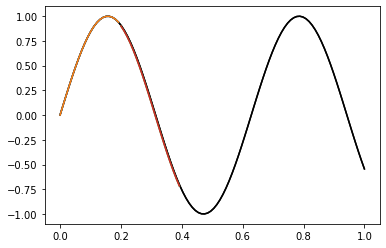

In [107]:
fig, ax = plt.subplots()
ax.plot(xdat,s_arr[0], "k")
#ax.plot(xdat[:20], spl_arr[0][0])
for i in range(2):
    ax.plot(xdat[:20] + i/5, c_arr[0][i])

In [110]:
with h5py.File("/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam/test_2_dynesty2/1024Hz_1s_full_15par_2det_fullparam_2_result.hdf5","r") as f:
    print(f.keys())

<KeysViewHDF5 ['__module__', '__name__', 'constraint_parameter_keys', 'fixed_parameter_keys', 'information_gain', 'injection_parameters', 'label', 'log_bayes_factor', 'log_evidence', 'log_evidence_err', 'log_likelihood_evaluations', 'log_noise_evidence', 'log_prior_evaluations', 'meta_data', 'nested_samples', 'outdir', 'parameter_labels', 'parameter_labels_with_unit', 'posterior', 'priors', 'sampler', 'sampler_kwargs', 'samples', 'sampling_time', 'search_parameter_keys', 'use_ratio', 'version']>


In [109]:
data

<Closed HDF5 file>

In [36]:
rdir = "/home/joseph.bayley/data/CBC/O4_2/data_1024Hz_4s_3det_gaussnoise_polarisation/validation/data_0_1000.0.h5py"

In [37]:
with h5py.File(rdir,"r") as f:
    print(f.keys())

<KeysViewHDF5 ['injection_parameters_keys', 'injection_parameters_values', 'snrs', 'y_hplus_hcross']>


In [ ]:
{f"p{i}_{bnd}":val for i in range(3) for bnd,val in zip(["min","max"], [0,1])}